In [41]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (between 0 and 1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split the full training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Reshape data for CNN input
X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# One-hot encode labels (for categorical classification)
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),  # Increased dropout rate

    Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()


/Users/yasiru/Downloads/DNN/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,978 (3.28 MB)

 Trainable params: 859,658 (3.28 MB)

 Non-trainable params: 320 (1.25 KB)

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7095 - loss: 0.8868 - val_accuracy: 0.8503 - val_loss: 0.4060
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8264 - loss: 0.4911 - val_accuracy: 0.8805 - val_loss: 0.3272
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8597 - loss: 0.3869 - val_accuracy: 0.8863 - val_loss: 0.3084
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8757 - loss: 0.3420 - val_accuracy: 0.8793 - val_loss: 0.3232
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8918 - loss: 0.3010 - val_accuracy: 0.8890 - val_loss: 0.2980
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8967 - loss: 0.2895 - val_accuracy: 0.8954 - val_loss: 0.2793
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9041 - loss: 0.2674 - val_accuracy: 0.9048 - val_loss: 0.2663
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9095 -

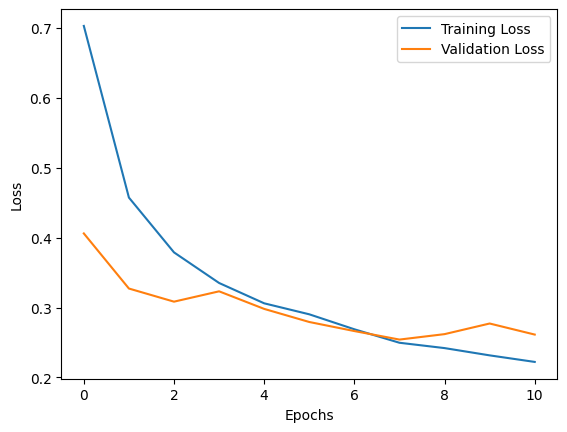

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(X_train)


history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    batch_size=32
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the labels for the test data
y_pred = model.predict(X_test).argmax(axis=1)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 90.23%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix:
 [[883   0  17  19   5   0  70   0   6   0]
 [  2 971   1  20   3   0   1   0   2   0]
 [ 17   0 847   8  64   0  60   0   4   0]
 [ 17   1  11 908  29   0  27   0   5   2]
 [  2   0  46  34 854   0  64   0   0   0]
 [  0   0   0   0   0 976   0  16   0   8]
 [153   0  58  22  73   0 680   0  14   0]
 [  0   0   0   0   0  16   0 959   0  25]
 [  3   0   1   6   2   2   3   3 979   1]
 [  0   0   0   0   0   5   0  29   0 966]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.86      0.85      0.86      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.85      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.68      0.71      1000
           7       0.95      

In [46]:
# learning_rates = [0.0001, 0.001, 0.01, 0.1]
# histories = []

# for lr in learning_rates:
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
#     histories.append(history)

# # Plot loss for different learning rates
# plt.figure(figsize=(10, 5))
# for i, lr in enumerate(learning_rates):
#     plt.plot(histories[i].history['val_loss'], label=f'LR = {lr}')
# plt.xlabel('Epochs')
# plt.ylabel('Validation Loss')
# plt.legend()
# plt.show()
